In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import os
import sys
import json

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import font_manager
%matplotlib inline
import matplotlib.colors as colors


In [3]:
# resource configuration
rcParams['figure.dpi'] = 200

# fount information
rcParams['font.family'] = 'Equinor'
rcParams['font.size'] = 9

# fornt location
font_path = r'Equinor_regular'
font_files = font_manager.findSystemFonts(fontpaths=font_path)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [4]:
# where WellClass and Ga[ codes are located
sys.path.append('../')

In [5]:
# WellClass
# from well_class_v2 import csv_parser, Well
from src.WellClass.libs.utils import (
    csv_parser,
    yaml_parser,
)
from src.WellClass.libs.well_class import Well
from src.WellClass.libs.well_pressure import Pressure

# plots
from src.WellClass.libs.plotting import (
    plot_pressure,
    plot_pt,
    plot_sketch,
)

## Some user options

In [6]:
# pick an example from given three options

case_type = 'wildcat'

# case_type = 'smeaheia_v1'

# case_type = 'smeaheia_v2'

In [7]:
# where pvt located
pvt_path = '../src/WellClass/libs/pvt/pvt_constants/pure_co2'

# Examples

The following are the test examples.

In [8]:
# examples
smeaheia_v1 = {'well_input': r'GaP_input_Smeaheia_v3.csv', 
               'well_input_yaml': r'smeaheia.yaml', 
            #    'sim_path': r'/scratch/SCS/eim/SMEAHEIA', 
               'sim_path': r'../test_data/examples/smeaheia_v1',
               'simcase': r'GEN_NOLGR_PH2'}
smeaheia_v2 = {'well_input': r'GaP_input_Smeaheia_v3.csv', 
               'well_input_yaml': r'smeaheia.yaml', 
            #    'sim_path': r'/scratch/SCS/bkh/wbook/realization-0/iter-0/pflotran/model', 
               'sim_path': r'../test_data/examples/smeaheia_v2', 
               'simcase': r'TEMP-0'}
wildcat = {
         'well_input': r'GaP_input_Wildcat_v3.csv', 
         'well_input_yaml': r'wildcat.yaml', 
        #  'sim_path': r'/scratch/SCS/bkh/well_class_test1/realization-0/iter-0/pflotran/model', 
         'sim_path': r'../test_data/examples/wildcat', 
         'simcase': r'TEMP-0'}

In [9]:
examples = {
    'smeaheia_v1': smeaheia_v1,
    'smeaheia_v2': smeaheia_v2,
    'wildcat': wildcat
}

In [10]:
# the selected example for testing
case = examples[case_type]


In [11]:

# root_path = '/scratch/SCS/gpb/SCREEN/GaP_code'

sim_path = case['sim_path']


# Load well CSV file

Process CSV with well class.
Predefine a dictionary that includes the input CSV well file, the simulation path, and the PFT sim case name

In [12]:
# where well configuration file is located
well_name = os.path.join(sim_path, case['well_input'])

# load the well information
well_csv = csv_parser(well_name)

In [13]:
#Process well by running well class
my_well = Well( header       = well_csv['well_header'], 
                drilling     = well_csv['drilling'],
                casings      = well_csv['casing_cement'],
                geology      = well_csv['geology'],
                barriers     = well_csv['barriers'], 
                barrier_perm = well_csv['barrier_permeability'],
                co2_datum    = well_csv['co2_datum'],
           )

In [14]:
my_well.inventory

{'drilling': True, 'casings': True, 'barriers': True, 'geology': True}

In [15]:
my_well = Well( header       = well_csv['well_header'], 
                co2_datum    = well_csv['co2_datum'],
           )

No drilling table declared.
No casings table declared.
No barriers table declared.
No geology table declared.


In [16]:
my_well.co2_datum

2370

In [17]:
my_pressure = Pressure(
    header      = well_csv['well_header'],
    reservoir_P = well_csv['reservoir_pressure'],
    co2_datum   = well_csv['co2_datum'],
    max_pressure_pos=[800, 600],
    pvt_path    = pvt_path,
)

Computing pressures for pure CO2 (100% CO2)
Hydrostatic pressure at reference depth 2238 is 224.24
RP1 set as hydrostatic P = 224.24 bar
RP2 is set as delta pressure, which yields P = 224.24 +20.00 = 244.24 bar
max_pressure_pos is a value
Pressure scenario RP1: Compute pressures assuming reservoir pressure is 224.24 bar at 2238.00 mTVDMSL
Pressure scenario RP2: Compute pressures assuming reservoir pressure is 244.24 bar at 2238.00 mTVDMSL
Pressure scenario max_p_at_800: Compute maximum pressurization needed to reach Shmin at 800 mTVDMSL
Pressure scenario max_p_at_600: Compute maximum pressurization needed to reach Shmin at 600 mTVDMSL


In [18]:
pd.DataFrame(my_pressure.pressure_scenarios).T


,name,p_resrv,type,p_MSAD,z_MSAD,z_resrv,p_delta
1,RP1,224.236695,reservoir,111.709851,695.746923,2238,0.0
2,RP2,244.236695,reservoir,143.81891,885.180899,2238,20.0
3,max_p_at_800,248.306087,max_p,129.380748,800,2370,11.151707
4,max_p_at_600,226.513725,max_p,95.480748,600,2370,-10.640655


In [19]:
my_pressure.pressure_CO2

init                                         RP1               \
     depth_msl    temp        hs_p       Shmin         h2o      h2o_rho   
0            0    4.00    1.013250    1.013250    1.017127  1025.768142   
1            1    4.00    1.113844    1.113844    1.117720  1025.773196   
2            2    4.00    1.214438    1.214438    1.218314  1025.778250   
3            3    4.00    1.315033    1.315033    1.318908  1025.783303   
4            4    4.00    1.415628    1.415628    1.419503  1025.788357   
...        ...     ...         ...         ...         ...          ...   
4465      4465  178.40  436.165105  750.598248  436.216675   936.616686   
4466      4466  178.44  436.256953  750.767748  436.308523   936.579086   
4467      4467  178.48  436.348797  750.937248  436.400368   936.541481   
4468      4468  178.52  436.440638  751.106748  436.492210   936.503870   
4469      4469  178.56  436.532475  751.276248  436.584047   936.466252   

                                                          RP2  ...  \
            co2     co2_rho h2o_rho_in_co2_column         h2o  ...   
0     50.599649  919.085567           1028.245364   20.823300  ...   
1     50.689783  919.170172           1028.249842   20.923991  ...   
2     50.779923  919.254698           1028.254320   21.024682  ...   
3     50.870067  919.339146           1028.258798   21.125374  ...   
4     50.960217  919.423515           1028.263277   21.226065  ...   
...         ...         ...                   ...         ...  ...   
4465        NaN         NaN                   NaN  456.407962  ...   
4466        NaN         NaN                   NaN  456.499811  ...   
4467        NaN         NaN                   NaN  456.591657  ...   
4468        NaN         NaN                   NaN  456.683499  ...   
4469        NaN         NaN                   NaN  456.775336  ...   

     max_p_at_800                                                             \
              co2     co2_rho         h2o      h2o_rho h2o_rho_in_co2_column   
0             NaN         NaN   12.057768  1026.322157                   NaN   
1             NaN         NaN   12.158416  1026.327201                   NaN   
2             NaN         NaN   12.259064  1026.332245                   NaN   
3             NaN         NaN   12.359712  1026.337289                   NaN   
4             NaN         NaN   12.460361  1026.342333                   NaN   
...           ...         ...         ...          ...                   ...   
4465          NaN  608.814408  447.475491   936.616686                   NaN   
4466          NaN  608.784966  447.567340   936.579086                   NaN   
4467          NaN  608.755535  447.659186   936.541481                   NaN   
4468          NaN  608.726115  447.751027   936.503870                   NaN   
4469          NaN  608.696705  447.842865   936.466252                   NaN   

     max_p_at_600                                                             
              co2     co2_rho         h2o      h2o_rho h2o_rho_in_co2_column  
0             NaN         NaN   -9.521902  1025.767281                   NaN  
1             NaN         NaN   -9.421309  1025.767281                   NaN  
2             NaN         NaN   -9.320715  1025.767281                   NaN  
3             NaN         NaN   -9.220122  1025.767281                   NaN  
4             NaN         NaN   -9.119528  1025.767281                   NaN  
...           ...         ...         ...          ...                   ...  
4465          NaN  578.944199  425.484824   936.616686                   NaN  
4466          NaN  578.916934  425.576672   936.579086                   NaN  
4467          NaN  578.889679  425.668517   936.541481                   NaN  
4468          NaN  578.862435  425.760358   936.503870                   NaN  
4469          NaN  578.835202  425.852196   936.466252                   NaN  

[4470 rows x 24 columns]

[2370]


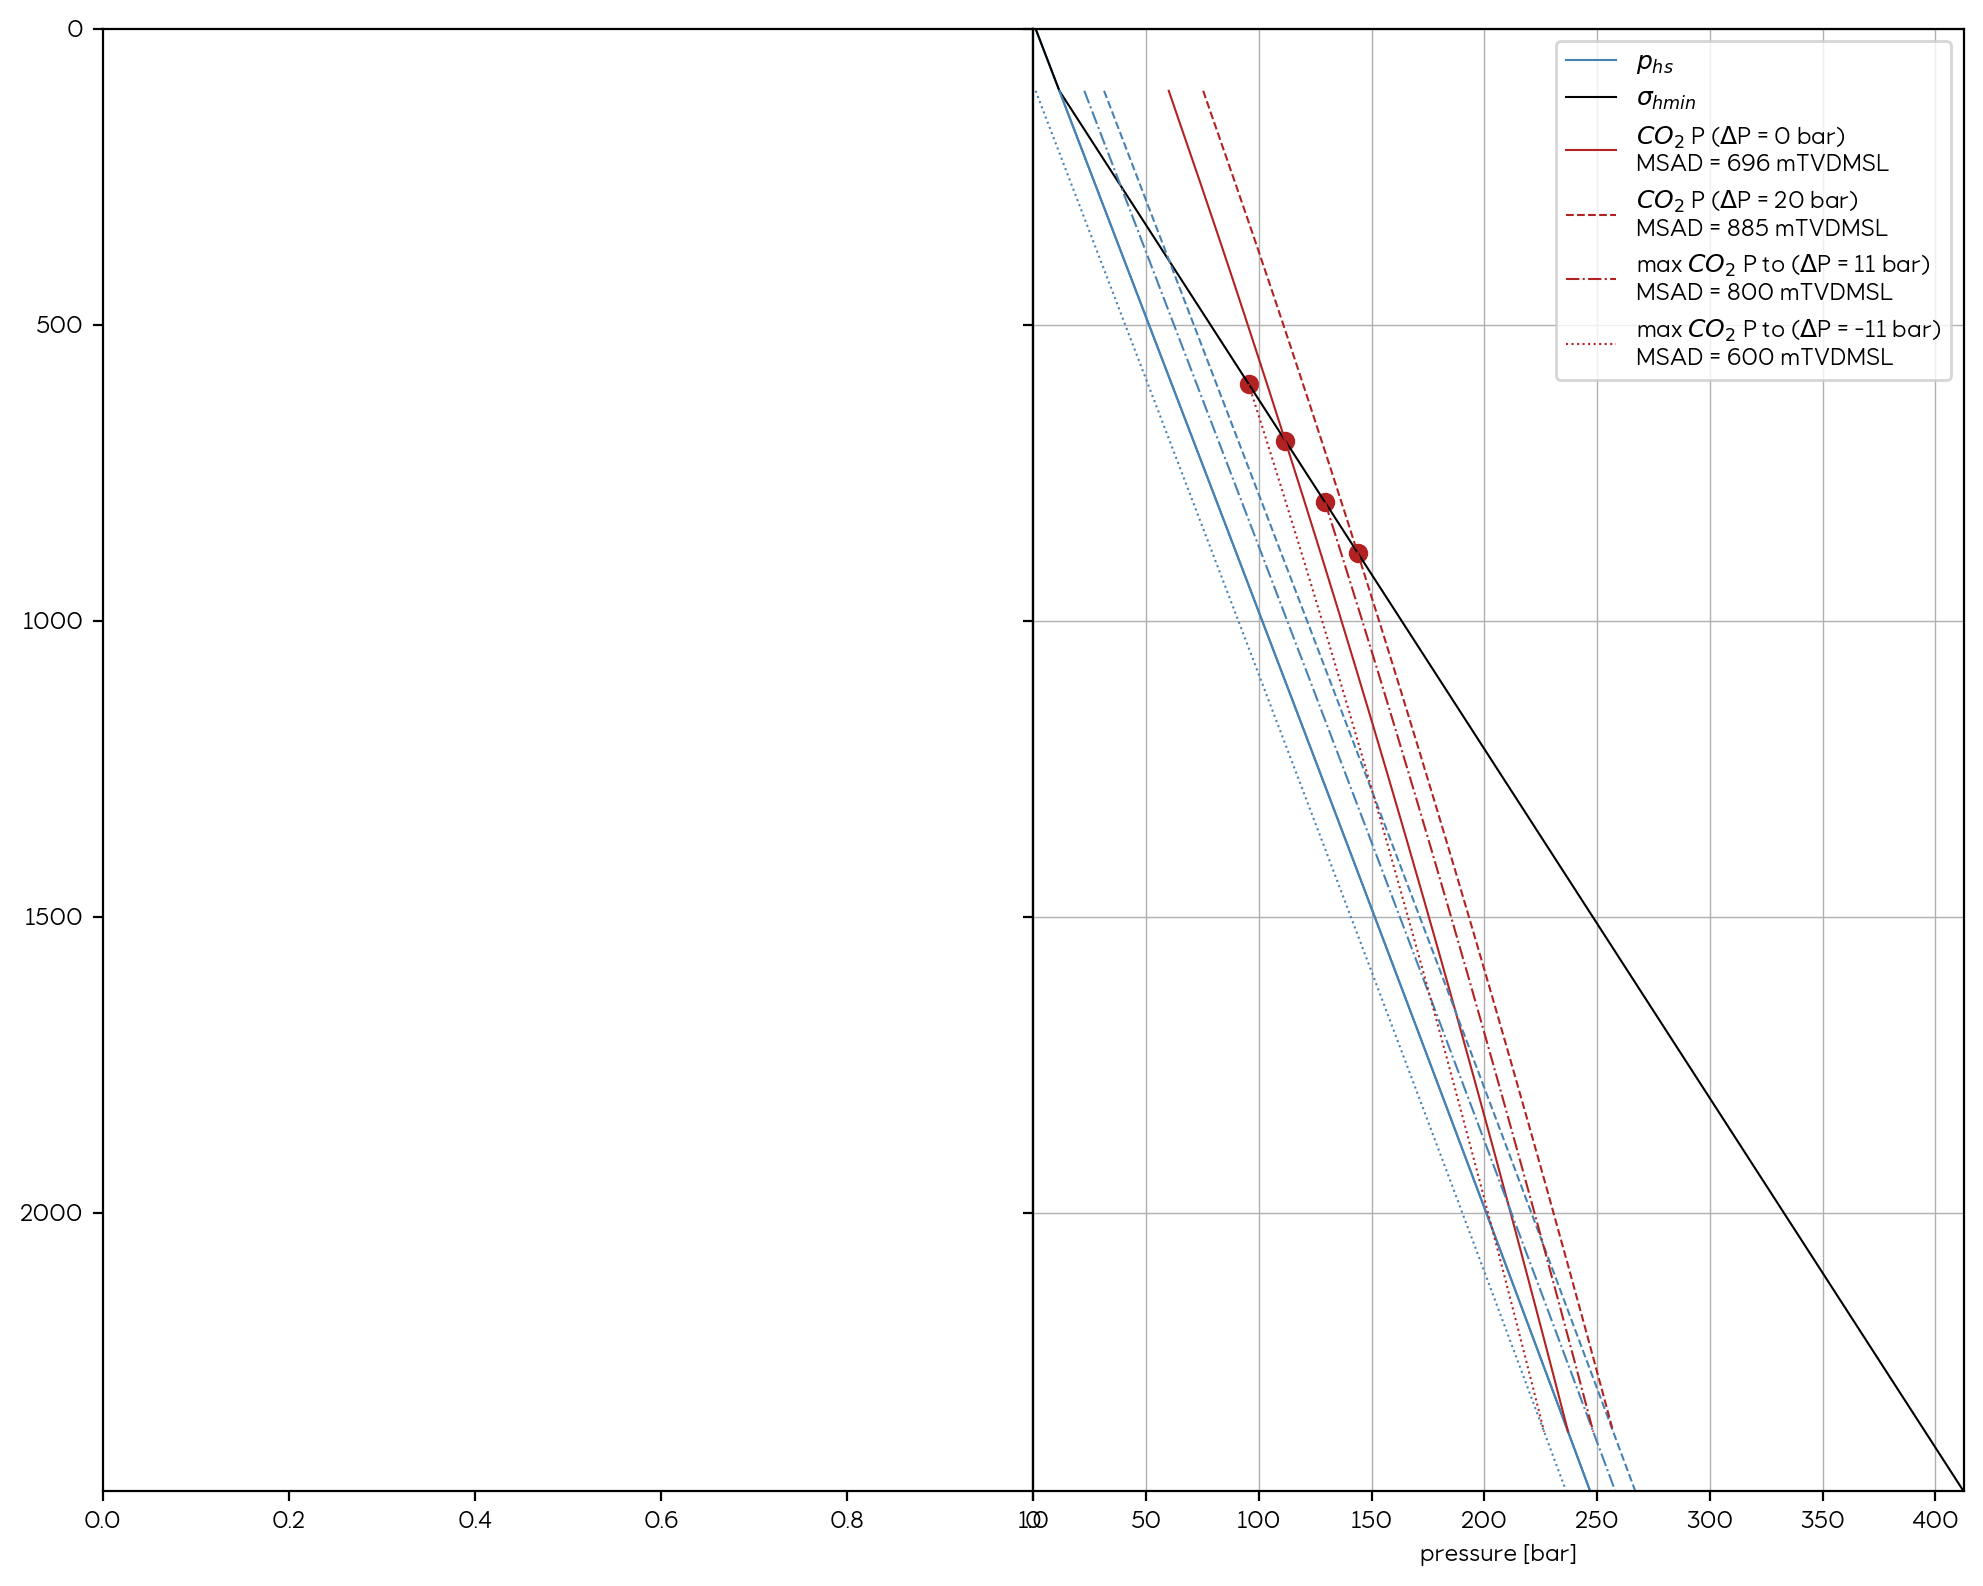

In [20]:
#Plot sketch, pressures
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10, 8))
# plot_sketch(my_well, draw_open_hole=False, ax=ax1)
plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax2, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_RP=True, #plot reservoir pressure scenarios
              plot_MSAD= True, #plot minimum safety abandonment depth
              plot_maxP=True #plot max expected pressures
              )

fig.tight_layout()
fig.subplots_adjust(wspace=0)

In [21]:
my_pressure

Pressure(header={'well_name': 'NO 17/4-1', 'well_rkb': 27.0, 'sf_depth_msl': 105.0, 'well_td_rkb': 3997.0, 'sf_temp': 4.0, 'geo_tgrad': 40.0}, reservoir_P={'depth_msl': 2238, 'RP1': nan, 'RP2': '+ 20', 'hydrostatic_pressure': 224.23669461502462}, co2_datum=2370, pvt_path='../test_data/pvt_constants/pure_co2', barriers=None, max_pressure_pos=[800, 600], pressure_scenarios={1: {'name': 'RP1', 'p_resrv': 224.23669461502462, 'type': 'reservoir', 'p_MSAD': 111.70985102245358, 'z_MSAD': 695.7469232552788, 'z_resrv': 2238, 'p_delta': 0.0}, 2: {'name': 'RP2', 'p_resrv': 244.23669461502462, 'type': 'reservoir', 'p_MSAD': 143.81890988104615, 'z_MSAD': 885.1808988221967, 'z_resrv': 2238, 'p_delta': 20.0}, 3: {'name': 'max_p_at_800', 'z_MSAD': 800, 'type': 'max_p', 'p_MSAD': 129.38074753068383, 'p_resrv': 248.3060870257736, 'z_resrv': 2370, 'p_delta': 11.151706815480168}, 4: {'name': 'max_p_at_600', 'z_MSAD': 600, 'type': 'max_p', 'p_MSAD': 95.48074753068381, 'p_resrv': 226.51372489079068, 'z_resr

In [22]:
well_csv['reservoir_pressure']

{'depth_msl': 2238,
 'RP1': nan,
 'RP2': '+ 20',
 'hydrostatic_pressure': 224.23669461502462}